In [62]:
from skimage import draw
from skimage.morphology import binary_dilation
from skimage.measure import regionprops, label
from keras.utils.np_utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
%matplotlib inline

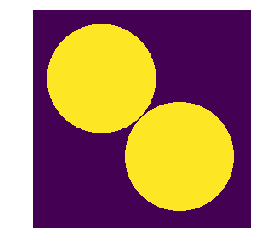

In [99]:
x = np.zeros((256, 256))
cy, cx = 80, 80
radius = 64
cy2 = cx2 = (np.sqrt(cy **2 + cx **2) + 2 * radius) * np.cos(np.pi / 4) + 1
o1r, o1c = draw.circle(cy, cx, radius)
o2r, o2c = draw.circle(cy2, cx2, radius)
x[o1r, o1c] = 1
x[o2r, o2c] = 1
plt.imshow(x)
_ = plt.axis('off')

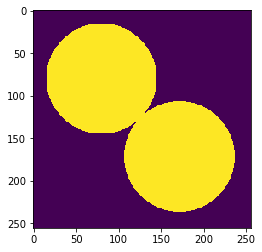

In [14]:
plt.imshow(binary_dilation(x))

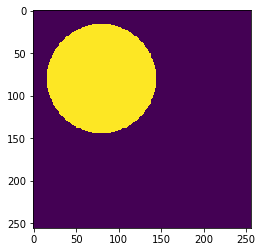

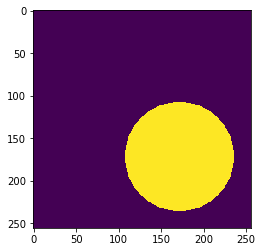

In [102]:
xlabel = label(x)
regions = regionprops(xlabel)
ground_truth_masks = []
for region in regions:
    rrows, rcols = zip(region.coords.T)
    X = np.zeros((256, 256))
    X[rrows, rcols] = 1
    ground_truth_masks.append(X)
    plt.figure()
    plt.imshow(X)

In [24]:
predicted_mask = [binary_dilation(x)]

In [42]:
y_true = np.array(ground_truth_masks)
y_true = y_true.sum(0)

In [63]:
y_pred = np.array(predicted_mask)
y_pred = y_pred.sum(0)

In [61]:
roc_auc_score(y_true.ravel(), y_pred.ravel())

0.9908531222515392

# IOU

In [68]:
THRESHOLDS = np.arange(0.5, 1, 0.05)

array([0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])

In [84]:
t = THRESHOLDS[0]

In [87]:
def iou(x, y):
    return np.logical_and(x, y).sum() / np.logical_or(x, y).sum()

In [88]:
prediction1 = predicted_mask[0]

In [89]:
obj1, obj2 = ground_truth_masks[0], ground_truth_masks[1]

In [90]:
iou(prediction1, obj1)

0.48543579281423554

In [91]:
iou(prediction1, obj2)

0.487060334731195

In [93]:
evaluate_image(masks_true, masks_pred)

0.0

# New predictions

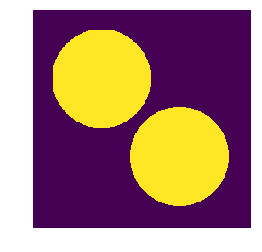

In [116]:
xnew = np.zeros((256, 256))
cy, cx = 80, 80
radiusn = 58
cy2 = cx2 = (np.sqrt(cy **2 + cx **2) + 2 * 64) * np.cos(np.pi / 4) + 1
o1r, o1c = draw.circle(cy, cx, radiusn)
o2r, o2c = draw.circle(cy2, cx2, radiusn)
xnew[o1r, o1c] = 1
xnew[o2r, o2c] = 1
plt.imshow(xnew)
_ = plt.axis('off')

In [117]:
xlabelnew = label(xnew)
regions = regionprops(xlabelnew)
predicted_masks_new = []
for region in regions:
    rrows, rcols = zip(region.coords.T)
    X = np.zeros((256, 256))
    X[rrows, rcols] = 1
    predicted_masks_new.append(X)

In [118]:
y_pred_new = np.array(predicted_masks_new)
y_pred_new = y_pred_new.sum(0)

In [119]:
roc_auc_score(y_true.ravel(), y_pred_new.ravel())

0.9102598966629113

In [120]:
masks_pred_new = np.array(predicted_masks_new)

In [121]:
evaluate_image(masks_true, masks_pred_new)

0.7

In [123]:
# conclusion: segmentation errors are penalized a lot more than pixelwise loss,
# pixelwise accuracy is rewarded a lot less than correct segmentation

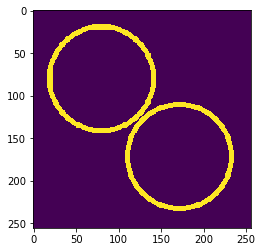

In [124]:
plt.imshow(np.abs(y_true - y_pred_new))